# Impression, Click, CTR

In [6]:
import duckdb
import pandas as pd
import matplotlib.pyplot as plt

# CSV_PATH = '/Users/aaron/Documents/Projects/202505_Google_SEO/OriginData/desktop_google_data_1y_20250518.csv'
# NORM = 100

CSV_PATH = '/Users/aaron/Documents/Projects/202505_Google_SEO/OriginData/mobile_google_data_1y_20250518.csv'
NORM = 30



# DuckDB 쿼리 실행
con = duckdb.connect()
df = con.execute(f"""
    SELECT
        DATE_TRUNC('week', date) AS week,
        type,
        SUM(click) AS total_click,
        SUM(impression) /{NORM} AS total_impression,
        AVG(CAST(REPLACE(ctr, '%', '') AS DOUBLE) / 100.0) AS avg_ctr,
        AVG(rank) AS avg_rank
    FROM (
        SELECT *, 'desktop' AS type
        FROM read_csv_auto('{CSV_PATH}')
    )
    GROUP BY DATE_TRUNC('week', date), type
    ORDER BY week, type
""").df()  # DuckDB -> pandas


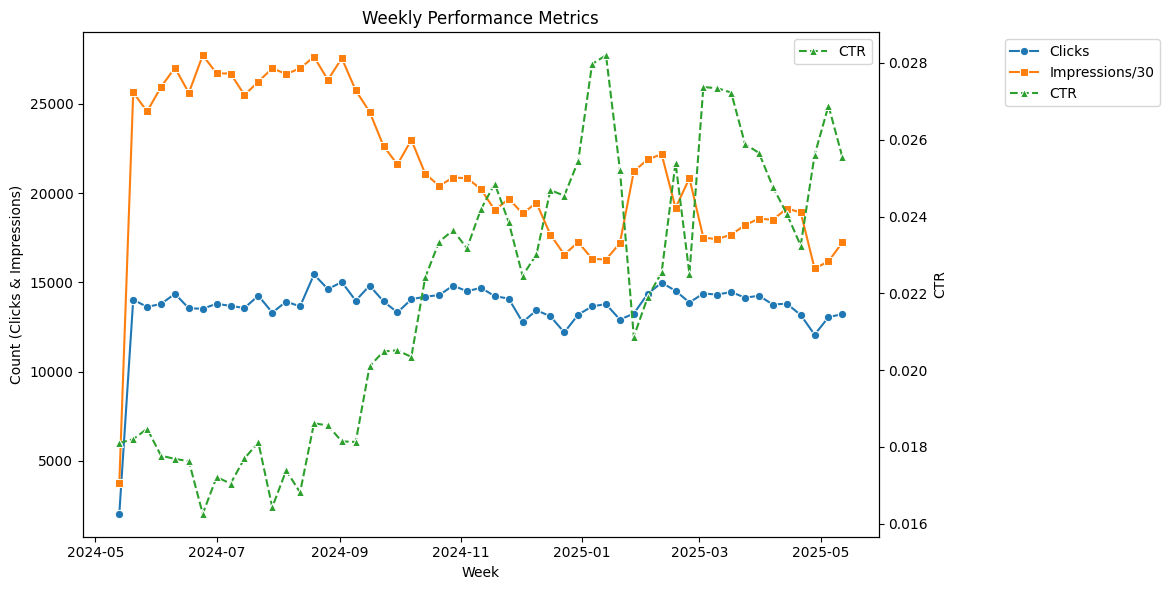

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# 그래프 생성
fig, ax1 = plt.subplots(figsize=(12, 6))

# 색상 팔레트 설정
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # 파란색, 주황색, 초록색

# clicks와 impressions를 왼쪽 축에 표시
sns.lineplot(data=df, x='week', y='total_click', color=colors[0], ax=ax1, marker='o', label='Clicks')
sns.lineplot(data=df, x='week', y='total_impression', color=colors[1], ax=ax1, marker='s', label=f'Impressions/{NORM}')

# 오른쪽 축 생성
ax2 = ax1.twinx()

# CTR을 오른쪽 축에 표시
sns.lineplot(data=df, x='week', y='avg_ctr', color=colors[2], ax=ax2, marker='^', linestyle='--', label='CTR')

# 축 레이블 설정
ax1.set_xlabel('Week')
ax1.set_ylabel('Count (Clicks & Impressions)')
ax2.set_ylabel('CTR')

# 제목 설정
plt.title("Weekly Performance Metrics")

# x축 레이블 회전
plt.xticks(rotation=45)

# 범례 표시
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', bbox_to_anchor=(1.15, 1))

# 레이아웃 조정
plt.tight_layout()
plt.show()